## Imports

In [76]:
# Bibliotecas para análise de dados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Bibliotecas para Machine Learning
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import tree

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import tensorflow as tf

import lightgbm as lgb


## Functions

In [72]:
def import_data(data_path, sep=','):
    data = pd.read_csv(f'{data_path}')
    
    data.head()
    return data
def create_pie_plot(data, names, title_text_x='', title_text_y=''):
    fig = px.pie(data, names=f'{names}', width=500, color_discrete_sequence=['#19647E', '#A31621'])
    fig.update_xaxes(title_text=f'{title_text_x}')
    fig.update_yaxes(title_text=f'{title_text_y}')
    fig.update_layout(bargap=0.2)
    
    return fig
def create_hist_plot(data, x, color, labels={}, title_text_x='', title_text_y=''):
    
    fig = px.histogram(data, x=f'{x}', width=500, color_discrete_sequence=['#19647E', '#A31621'], color=f'{color}', labels=labels)
    fig.update_xaxes(title_text=f'{title_text_x}')
    fig.update_yaxes(title_text=f'{title_text_y}')
    fig.update_layout(bargap=0.2)
    
    return fig
def create_corr_plot(data, title, cmap='coolwarm'):
    plt.figure(figsize=(12,8))
    sns.heatmap(data.corr(),annot=True,cmap=f'{cmap}')
    plt.title(f'{title}',fontsize=20)
    return plt

## Preparing the Data

Import the data

In [41]:
data = import_data("Heart Failure Clinical Records.csv")
data.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


## Preparing the Data

### Exploratory Analysis

In [42]:
#Looking the dataset size

print('Data size: ', end='')
print(f'{data.shape[0]} rows and {data.shape[1]} rows')

Data size: 299 rows and 13 rows


In [43]:
#Looking data types of all columns

data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [44]:
#Looking for NaN values

data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [45]:
#Looking other details from dataset

data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### Cleaning the data

In [46]:
#Removing outliers

data = data.drop(data[data['platelets']>420000].index)
data = data.drop(data[data['serum_creatinine']>2.5].index)
data = data.drop(data[data['creatinine_phosphokinase']>1500].index)

### Data visualization

In [47]:
# Create temporary copy of the dataset to make data visualization graphs without change anything of the original

tmp = data.copy()

# Setting configs for a better visualization

tmp['sex'] = tmp['sex'].apply(lambda x: 'Women' if x == 0 else 'Men')
tmp['DEATH_EVENT'] = tmp['DEATH_EVENT'].apply(lambda x: 'Don\'t die' if x == 0 else 'Died')

Here we can see that we have more data from male patients than female patients.

In [48]:
# Creating pie plot

create_pie_plot(tmp, 'sex')

Here we can see that 32% of patients died during the process.

In [63]:
# Creating hist plot

create_hist_plot(tmp, 'DEATH_EVENT', 'sex', {'sex': 'Sex'}, 'Death Event')

Here we can see that, of the patients who died, the male patients are who most died (probably because we have more male patients registers in our dataset)

In [74]:
# Selecting only the registers where the patient died

graph_df = tmp.loc[tmp['DEATH_EVENT'] == 'Died']

# Creating pie plot

create_pie_plot(graph_df, 'sex')

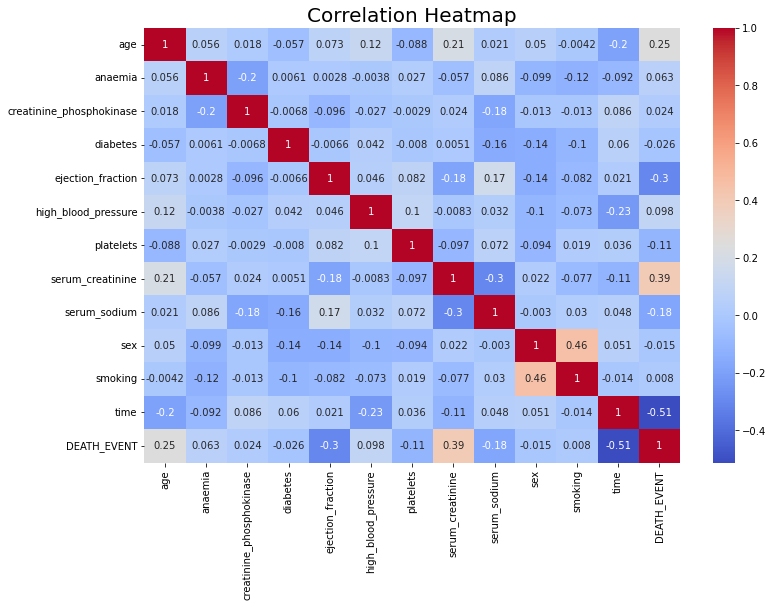

In [75]:
# Create correlation heatmap plot

create_corr_plot(data, 'Correlation Heatmap');

### Splitting data in train and test set

In [52]:
# Selecting the 

X = data[['time', 'serum_creatinine', 'ejection_fraction', 'age']]
y = data['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Criando modelos

Antes de mais nada, vamos esclarescer algumas decisões tomadas para decidirmos o melhor modelo:

    • Iremos prestar atenção principalmente para o recall do modelo, pois ele tenta analisar aqueles que o modelo realmente acertou (ideal para doenças pois analisa principalmente VERDADEIROS POSITIVOS)

LogisticRegression

In [53]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
prev = clf.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, prev)}')
print(f'Recall: {recall_score(y_test, prev)}')
print(f'F1: {f1_score(y_test, prev)}')
print(confusion_matrix(y_test, prev))


Accuracy: 0.8860759493670886
Recall: 0.7619047619047619
F1: 0.7804878048780488
[[54  4]
 [ 5 16]]


DecisionTree

In [54]:
clf = tree.DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
prev = clf.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, prev)}')
print(f'Recall: {recall_score(y_test, prev)}')
print(f'F1: {f1_score(y_test, prev)}')
print(confusion_matrix(y_test, prev))


Accuracy: 0.8860759493670886
Recall: 0.8095238095238095
F1: 0.7906976744186046
[[53  5]
 [ 4 17]]


KNN

In [55]:
neigh = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)
prev = neigh.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, prev)}')
print(f'Recall: {recall_score(y_test, prev)}')
print(f'F1: {f1_score(y_test, prev)}')
print(confusion_matrix(y_test, prev))

Accuracy: 0.8354430379746836
Recall: 0.47619047619047616
F1: 0.6060606060606061
[[56  2]
 [11 10]]


SVM

In [56]:
model = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(X_train, y_train)
prev = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, prev)}')
print(f'Recall: {recall_score(y_test, prev)}')
print(f'F1: {f1_score(y_test, prev)}')
print(confusion_matrix(y_test, prev))

Accuracy: 0.9240506329113924
Recall: 0.9047619047619048
F1: 0.8636363636363636
[[54  4]
 [ 2 19]]


RandomForest

In [57]:
clf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
prev = clf.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, prev)}')
print(f'Recall: {recall_score(y_test, prev)}')
print(f'F1: {f1_score(y_test, prev)}')
print(confusion_matrix(y_test, prev))

Accuracy: 0.8734177215189873
Recall: 0.6190476190476191
F1: 0.7222222222222222
[[56  2]
 [ 8 13]]


GradientBoosting

In [58]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
prev = clf.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, prev)}')
print(f'Recall: {recall_score(y_test, prev)}')
print(f'F1: {f1_score(y_test, prev)}')
print(confusion_matrix(y_test, prev))

Accuracy: 0.810126582278481
Recall: 0.6190476190476191
F1: 0.6341463414634146
[[51  7]
 [ 8 13]]


Keras

In [59]:
classificador = Sequential()
classificador.add(Dense(units=3, activation='relu', input_dim=4))
classificador.add(Dense(units=3, activation='relu'))
classificador.add(Dense(units=1, activation='sigmoid'))
classificador.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall()])

classificador.fit(X_train, y_train, batch_size=10, epochs=400, verbose=0)

KeyboardInterrupt: 

In [ ]:
prev = classificador.predict(X_test)
prev = (prev > 0.6)
print(f'Accuracy: {accuracy_score(y_test, prev)}')
print(f'Recall: {recall_score(y_test, prev)}')
print(f'F1: {f1_score(y_test, prev)}')
print(confusion_matrix(y_test, prev))

3/3 [==============================] - 0s 3ms/step
Accuracy: 0.8607594936708861
Recall: 0.5238095238095238
F1: 0.6666666666666667
[[57  1]
 [10 11]]


LGBMClassifier

In [ ]:
clf = lgb.LGBMClassifier().fit(X_train, y_train)
prev = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, prev)}')
print(f'Recall: {recall_score(y_test, prev)}')
print(f'F1: {f1_score(y_test, prev)}')
print(confusion_matrix(y_test, prev))

Accuracy: 0.8354430379746836
Recall: 0.6666666666666666
F1: 0.6829268292682926
[[52  6]
 [ 7 14]]


# Melhorando o melhor modelo

### O melhor modelo encontrado foi o SVC:

In [ ]:
model = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(X_train, y_train)
prev = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, prev)}')
print(f'Recall: {recall_score(y_test, prev)}')
print(f'F1: {f1_score(y_test, prev)}')
print(confusion_matrix(y_test, prev))

Accuracy: 0.9240506329113924
Recall: 0.9047619047619048
F1: 0.8636363636363636
[[54  4]
 [ 2 19]]


Testando hyperparametros

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf', 'sigmoid'],
              'class_weight': ['balanced'],
              'random_state': [1]
            } 

grid = GridSearchCV(SVC(), param_grid, refit = True, scoring='recall')
grid.fit(X_train, y_train)

grid_predictions = grid.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, grid_predictions)}')
print(f'Recall: {recall_score(y_test, grid_predictions)}')
print(f'F1: {f1_score(y_test, grid_predictions)}')

print('--------------------------------------------')
print(grid.best_params_)
print(grid.best_estimator_)
print(confusion_matrix(y_test, grid_predictions))
print(grid.best_score_)

KeyboardInterrupt: 

Adicionando HyperParametros em nosso modelo

In [ ]:
model = make_pipeline(StandardScaler(), SVC(C=0.1, class_weight='balanced', gamma=1, kernel='linear', random_state=1)).fit(X_train, y_train)
prev = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, prev)}')
print(f'Recall: {recall_score(y_test, prev)}')
print(f'F1: {f1_score(y_test, prev)}')
print(confusion_matrix(y_test, prev))

Accuracy: 0.8481012658227848
Recall: 0.8571428571428571
F1: 0.75
[[49  9]
 [ 3 18]]
